In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(style='darkgrid')

import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
!ls *.csv

c4_bacterial_genome.csv  c4_sub_bacterial_genome.csv  Genomic_fna.csv


In [3]:
sub_gen = pd.read_csv('c4_bacterial_genome.csv')
sub_gen.head()

,g_s,genome,tag
0,Streptococcus_parauberis_KCTC_11537,ATGACAGAAAATGAACAAATTTTTTGGAATCGAATCTTGGAATTAG...,GCA_000213825.1
1,Streptococcus_pneumoniae_670-6B,TTTTATCTCACAAGGTTATCCACTATGTTTTTCGATAAAAAGCTTA...,GCA_000147095.1
2,Streptococcus_pneumoniae_gamPNI0373,TTTTATCTCACAAGGTTATCCACTATGTTTTTCGATAAAAAGCTTA...,GCA_000299015.1
3,Streptococcus_thermophilus_LMD-9,TTGTGGATAACCTCAAAATTTTTCTCTTTCTGACCTGTGGAAAACT...,GCA_000014485.1
4,Streptococcus_pyogenes_MGAS315,TTGTTGATATTCTGTTTTTTCTTTTTTAGTTTTCCACATAAAAAAT...,GCA_000007425.1


In [4]:
sub_gen.g_s = sub_gen.g_s.str.replace('\[|\]','').str.strip()

In [5]:
len(sub_gen)

343

In [6]:
lengths = [len(x) for x in sub_gen.genome.values]
print(max(lengths))
print(min(lengths))
print(np.mean(lengths))

3836419
1589620
2051926.61224


In [7]:
vec = CountVectorizer(analyzer='char',ngram_range=(5,5))
tsne_pipe = Pipeline([
    ('densifier',FunctionTransformer(lambda x : x.todense(), accept_sparse=True)),
    ('tsne', TSNE(n_components=2,init='pca',perplexity=30,n_iter=2000))
])

In [9]:
# import re
#print genus and species
# y = np.array([genus[:genus.index('_', genus.index('_')+1)].lower() for genus in all_sub_gen.g_s.values if re.search('_.*_',genus)])
#print only genus
y = np.array([genus[:genus.index('_')].lower() for genus in sub_gen.g_s.values])
%time vec_X = vec.fit_transform(sub_gen.genome.values)
print("\nNumber of features: %d" % len(vec.vocabulary_))

CPU times: user 4min 7s, sys: 8.58 s, total: 4min 16s
Wall time: 4min 16s

Number of features: 5603


In [10]:
%time X = tsne_pipe.fit_transform(vec_X)

CPU times: user 11.9 s, sys: 808 ms, total: 12.7 s
Wall time: 10.9 s


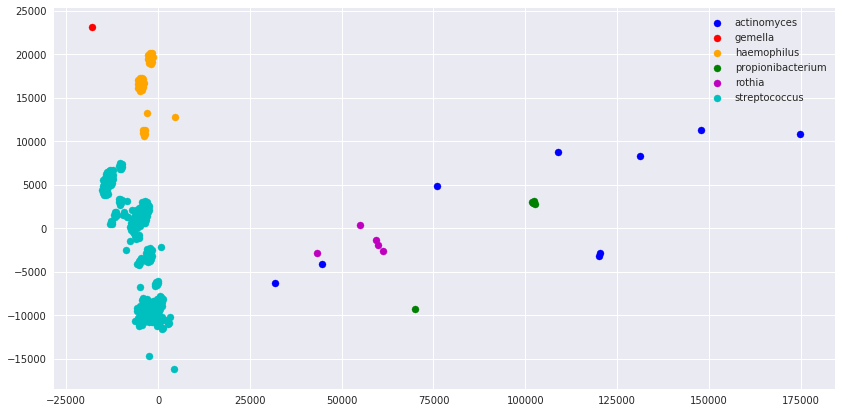

In [15]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111, projection=None)

colors = ['blue','red','orange','green','m','c']
for i,cl in enumerate(np.unique(y)):
    ax.scatter(X[y == cl][:,0],
               X[y == cl][:,1],
               c = colors[i], marker='o', 
               label = cl, s = 50)
ax.legend(loc='upper right')